# Neural Network from scratch 

First we need to figure out How neurons works ? 
It takes input and Multiply with weights then add the bias 

In [3]:
inputs = [1, 2, 3]
weights = [0.12, 0.5, 0.3]
bias = 3
output = 0;
for i in range(len(inputs)):
    output += inputs[i] * weights[i] + bias 
    
print(f"Output = {output}")

Output = 11.02


This this is the output of a single neuron 

Let's Now build a muiltiple neuron with same input but each neuron has differen weight and diffrent bias 

In [27]:
input_data = [1, 2, 3, 4]

# Neuron 1
weight1 = [0.2, 0.3, -0.5, 1]  
bias1 = 2

# Neuron 2 
weight2 = [0.22, 0.13, -0.25, 0.32]
bias2 = 4

# Neuron 3 
weight3 = [0.12, 0.33, -0.15, 0.9]
bias3 = 1

neurons = [weight1, weight2, weight3]
biases = [bias1, bias2, bias3]
layer_output = []

for i in range(len(neurons)):
    neuron_output = 0
    for j in range(len(input_data)):
        neuron_output += input_data[j] * neurons[i][j]
    neuron_output += biases[i]
    layer_output.append(neuron_output)

print(layer_output)

[5.3, 5.01, 4.93]


# Vectorization

Now we will use Vectorization to implement the same as we did here 

In [26]:
import numpy as np

# create numpy array of the weights, biases
weights = np.array([weight1, weight2, weight3])
biases = np.array([bias1, bias2, bias3])

print(f" weights :\n {weights}")

print()

print(f" biases : {biases}")

 weights :
 [[ 0.2   0.3  -0.5   1.  ]
 [ 0.22  0.13 -0.25  0.32]
 [ 0.12  0.33 -0.15  0.9 ]]

 biases : [2 4 1]


We victorized each of weights and biases let's compute the output here 

In [25]:
output_vectorized = np.dot(weights, np.array([1, 2, 3, 4])) + biases

print(output_vectorized)

[5.3  5.01 4.93]


# Mini batching the inputs and introduce layers 

We want here to introduce batching inputs so let's create new input list with batches and leave the weights as it's 

In [33]:
inputs = np.array([[1, 2, 3, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5, -0.27, 0.17, 0.87]])


print(weights.shape, inputs.shape)

(3, 4) (3, 4)


In [34]:
# We need to transpose the weights so we can dot product both matrices 

weights_T = weights.transpose()
print(weights_T.shape)

(4, 3)


In [40]:
# Now let's try dot product 
output = np.dot(inputs, weights_T) + biases 
print(f"output: \n {output}")

output: 
 [[3.8    4.53   3.58  ]
 [6.4    5.98   4.84  ]
 [2.404  3.8708 1.4884]]


## Let's Now add layers 2 

In [48]:
import numpy as np

# layer 1 input
inputs = np.array([[1, 2, 3, 2.5],
                   [2.0, 5.0, -1.0, 2.0],
                   [-1.5, -0.27, 0.17, 0.87]])

weights_1 = np.array([
    [0.2, 0.3, -0.5, 1.0],
    [0.22, 0.13, -0.25, 0.32],
    [0.12, 0.33, -0.15, 0.9]
])

# layer 2 weights
weights_2 = np.array([
    [0.21, 1.3, -1.5],
    [0.25, 0.153, -1.25],
    [0.9, 0.333, -0.115]
])

# layer 1 biases
bias_1 = np.array([2, 4, 1])

# layer 2 biases
bias_2 = np.array([1, 2, 3])

layer_1_output = np.dot(inputs, weights_1.T) + bias_1
print (f"Layer 1 output: \n {layer_1_output}")
layer_2_output = np.dot(layer_1_output, weights_2.T) + bias_2


print()
print(f"Layer 2 output: \n {layer_2_output}")

Layer 1 output: 
 [[3.8    4.53   3.58  ]
 [6.4    5.98   4.84  ]
 [2.404  3.8708 1.4884]]

Layer 2 output: 
 [[ 2.317     -0.83191    7.51679  ]
 [ 2.858     -1.53506   10.19474  ]
 [ 4.30428    1.3327324  6.2814104]]


# Objectify the Layer 

In [49]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.rand(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights)    

In [67]:
# Initializing Layers 
X = np.array([
    [1, 2, 3, 2.5],
    [2.0, 5.0, -1.0, 2.0],
    [-1.5, -0.27, 0.17, 0.87]
])

# Setting this to get the same initialized random weights 
np.random.seed(42)

# Layers 
layer_1 = Layer_Dense(4, 8)
layer_2 = Layer_Dense(8, 16)
layer_3 = Layer_Dense(16, 4)

# Forward propagation
layer_1.forward(X)
layer_2.forward(layer_1.output)
layer_3.forward(layer_2.output)

# output Layer
print(layer_3.output)

[[ 0.0948179   0.09580485  0.11659729  0.11474373]
 [ 0.10167208  0.10390484  0.12446101  0.12097983]
 [-0.01175102 -0.01186595 -0.0154539  -0.01433468]]


# Activation function

### **Why we use activation functions in feed forward ?**

In brief, activation functions are crucial in neural networks because they introduce **non-linearity**. Here's why that's important:

* **Linearity Limitation:**
    * Without activation functions, a neural network, no matter how many layers it has, would simply be a linear transformation of the input. This means it could only learn linear relationships.
    * Real-world data is rarely linear. To learn complex patterns, neural networks need to model non-linear relationships.
* **Non-linearity Enables Complex Learning:**
    * Activation functions introduce non-linearity, allowing the network to approximate any complex function.
    * This enables the network to learn intricate patterns, such as those found in images, speech, and text.
* **Breaking the Linear Chain:**
    * By adding activation functions, you break the linear chain of matrix multiplications, allowing for much more expressive models.
* **Decision making:**
    * Activation functions can help with decision making. For example, a sigmoid function outputs a value between 0 and 1, which can be interpreted as a probability.


In [73]:
# ReLu Activation function 

class Activation_ReLu:
    def __init__(self):
        pass
    
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

Matplotlib is building the font cache; this may take a moment.


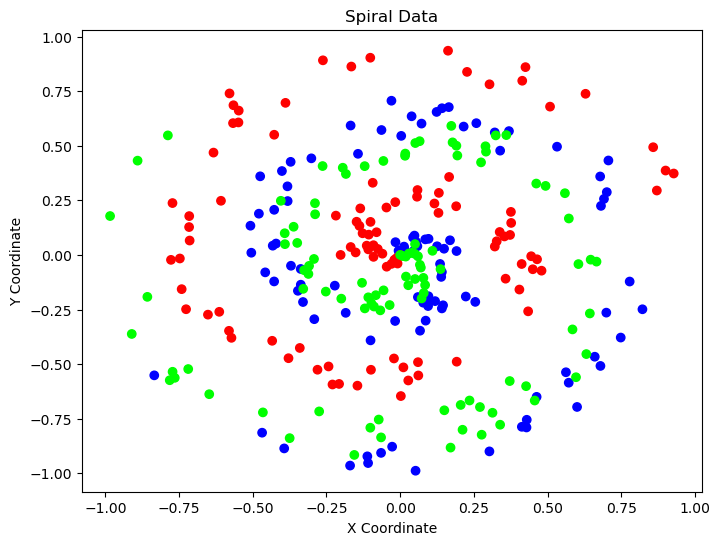

In [2]:
# Dataset Generation function 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

def plot_spiral_data(X, y):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.title("Spiral Data")
    plt.show()

# Example usage
points = 100
classes = 3
X, y = spiral_data(points, classes)
plot_spiral_data(X, y)

In [75]:
# Example usage
np.random.seed(42)
# Data 
X, y = spiral_data(100, 3)

layer_1 = Layer_Dense(2, 5)
layer_1.forward(X)

print(layer_1.output)

[[ 0.          0.          0.          0.          0.        ]
 [ 0.00042565  0.0003813   0.00080802  0.00037005  0.00097157]
 [ 0.00100695  0.00082994  0.00211776  0.00141365  0.0026307 ]
 ...
 [-0.02317968 -0.0134124  -0.065042   -0.07505612 -0.08680574]
 [-0.00686921  0.0006218  -0.03242948 -0.05657018 -0.04691788]
 [-0.00647407  0.00101523 -0.03179235 -0.05652143 -0.04619794]]


In [76]:
activation = Activation_ReLu()
activation.forward(layer_1.output)

print(activation.output)

[[0.         0.         0.         0.         0.        ]
 [0.00042565 0.0003813  0.00080802 0.00037005 0.00097157]
 [0.00100695 0.00082994 0.00211776 0.00141365 0.0026307 ]
 ...
 [0.         0.         0.         0.         0.        ]
 [0.         0.0006218  0.         0.         0.        ]
 [0.         0.00101523 0.         0.         0.        ]]


We successfully implemented the ReLu activation function 

# Softmax Activation function 

The softmax function transforms a vector of real numbers into a probability distribution. For an input vector `z`, each output `softmax(z_i)` represents the probability of the i-th class. The formula is:

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}
$$

This ensures all outputs are between 0 and 1, and their sum equals 1.


In [100]:
class Activation_Softmax:
    def __init__(self):
        pass
    
    def forward(self, inputs):
        self.output = softmax(inputs)
    
    def softmax(inputs):
        shifted_x = x - np.max(x, axis=-1, keepdims=True)
        exp_x = np.exp(shifted_x)
        return exp_x / np.sum(exp_x, axis=-1, keepdims=True)
    
        

In [95]:
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLu()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output[:3])

[[0.33333333 0.33333333 0.33333333]
 [0.33333274 0.33333579 0.33333147]
 [0.33333398 0.33334163 0.33332439]]


# Calculation Loss with Categorical Cross-Entropy 

**Categorical Cross-Entropy Loss:**

This loss function measures the difference between predicted probability distributions and true one-hot encoded labels, commonly used in multi-class classification. It penalizes incorrect predictions more severely.

**Formula:**

For a single sample:

$$
\text{Loss} = - \sum_{i=1}^{C} y_i \log(p_i)
$$

Where:

* $C$ is the number of classes.
* $y_i$ is 1 if the sample belongs to class $i$, 0 otherwise (one-hot encoding).
* $p_i$ is the predicted probability of the sample belonging to class $i$.

For a batch of samples, the loss is typically the average across all samples.


In [97]:
import numpy as np

def categorical_cross_entropy(y_true, y_pred):
    """
    Computes the categorical cross-entropy loss.

    Args:
        y_true: One-hot encoded true labels (shape: (batch_size, num_classes)).
        y_pred: Predicted probabilities (shape: (batch_size, num_classes)).

    Returns:
        The average categorical cross-entropy loss.
    """

    # Clip predictions to avoid log(0) errors.
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)

    # Calculate the loss for each sample.
    loss = -np.sum(y_true * np.log(y_pred), axis=1)

    # Calculate the average loss over the batch.
    return np.mean(loss)

# Example usage:
y_true = np.array([[0, 1, 0],  # True label: class 1
                   [1, 0, 0],  # True label: class 0
                   [0, 0, 1]]) # True label: class 2

y_pred = np.array([[0.05, 0.9, 0.05],  # Predicted probabilities
                   [0.8, 0.15, 0.05],
                   [0.1, 0.2, 0.7]])

loss = categorical_cross_entropy(y_true, y_pred)
print("Categorical Cross-Entropy Loss:", loss)


Categorical Cross-Entropy Loss: [0.10536052 0.22314355 0.35667494]


## Let's make the Loss class 

In [6]:
# Data Generation 
import numpy as np

def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

In [11]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.rand(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLu:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        

class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities =  exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities




class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

        
class Loss_CrossEntropy(Loss):    
    
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        if len(y_true.shape) == 1: 
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2:  
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
        else:
            raise ValueError("y_true has invalid shape")

        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods
        

Now let's try everything and see what works out and what don't 

In [12]:
import numpy as np
# Example Usage 
# Generate sample categorial data 
X, y = spiral_data(points= 100, classes=3)


dense1 = Layer_Dense(2, 10)
relu1 = Activation_ReLu()

dense2 = Layer_Dense(10, 10)
relu2 = Activation_ReLu()

dense3 = Layer_Dense(10, 3)
softmax = Activation_Softmax()


# Training feedforward 
dense1.forward(X)
relu1.forward(dense1.output)


dense2.forward(relu1.output)
relu2.forward(dense2.output)

dense3.forward(relu2.output)
softmax.forward(dense3.output)


output = softmax.output

loss = Loss_CrossEntropy()
loss_value = loss.calculate(output, y)

print("Categorical Cross-Entropy Loss:", loss_value)

Categorical Cross-Entropy Loss: 1.098595715669956


## Let's implement Accuracy 

In [19]:
def accuracy(softmax_output, y_true):
    predictions = np.argmax(softmax_output, axis=1)
    return np.mean(predictions == y_true)
    

acc = accuracy(output, y)

print(f"acc: {acc.round(2) * 100}%")

acc: 27.0%


# Gradient Update (Updating weights and Biases) Backpropagation

Let's Start from the start and work our ways to generalization 

Forward pass 

In [5]:
x = [1.0, -2.0, 3.0]
w = [-3.0, -1.0, 2.0]
b = 1.0 

# Multiply imputs and weights 
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

# Adding weights and bias 
z = xw0 + xw1 + xw2 + b

# ReLu activation function 
y = max(z, 0)

print(y) 

6.0


<img src="./images/neural-network.png" width="300" height="200">

Backward pass 

In [7]:
# The dervative from the next layer 
dvalue = 1.0 

# deravative of the ReLu and the chain rule 
drelu_dz = dvalue * (1. if z > 0 else 0.)
print (f"drelu_dz: {drelu_dz}")
# partial derivatives of the multplication, the chain rule 
# partial derivative of the sum function is always 1 
dsum_dxw0 = 1
dsum_dxw1 = 1
dsum_dxw2 = 1
dsum_db = 1

# partial dervative of relu w.r.t the weights [xw0, xw1, xw2] and bias [b]
drelu_dxw0 = drelu_dz * dsum_dxw0
drelu_dxw1 = drelu_dz * dsum_dxw1
drelu_dxw2 = drelu_dz * dsum_dxw2
drelu_db = drelu_dz * dsum_db
print (drelu_dxw0, drelu_dxw1, drelu_dxw2, drelu_db)

drelu_dz: 1.0
1.0 1.0 1.0 1.0


Continuing backward, the function that comes before the sum is the multiplication of weights and inputs. The derivative for a product is whatever the input is being multiplied by. Recall:

---


$$f(x, y) = x \cdot y \quad \rightarrow$$

$$\quad \frac{\partial}{\partial x} f(x, y) = y$$

$$\frac{\partial}{\partial y} f(x, y) = x$$



In [8]:
# partial derivatives of the multiplication, the chain rule 
dmul_dx0 = w[ 0 ]
dmul_dx1 = w[ 1 ]
dmul_dx2 = w[ 2 ]
dmul_dw0 = x[ 0 ]
dmul_dw1 = x[ 1 ]
dmul_dw2 = x[ 2 ]
drelu_dx0 = drelu_dxw0 * dmul_dx0
drelu_dw0 = drelu_dxw0 * dmul_dw0
drelu_dx1 = drelu_dxw1 * dmul_dx1
drelu_dw1 = drelu_dxw1 * dmul_dw1
drelu_dx2 = drelu_dxw2 * dmul_dx2
drelu_dw2 = drelu_dxw2 * dmul_dw2
print (drelu_dx0, drelu_dw0, drelu_dx1, drelu_dw1, drelu_dx2, drelu_dw2)

-3.0 1.0 -1.0 -2.0 2.0 3.0


In [10]:
dx = [drelu_dx0, drelu_dx1, drelu_dx2] # gradient for inputs 
dw = [drelu_dw0, drelu_dw1, drelu_dw2]# gradient for weights
db = drelu_db # gradient for bias 

# constant learning rate 
alpha = 0.001

# apply updates 
w[0] += - alpha * dw[0]
w[1] += - alpha * dw[1]
w[2] += - alpha * dw[2]
b += -alpha * db

print(f"updates:\nWeights: {w}\nBias: {b}")

updates:
Weights: [-3.001, -0.998, 1.997]
Bias: 0.999


Now, we’ve slightly changed the weights and bias in such a way so as to decrease the output
somewhat intelligently. We can see the effects of our tweaks on the output by doing another
forward pass:

In [11]:
xw0 = x[ 0 ] * w[ 0 ]
xw1 = x[ 1 ] * w[ 1 ]
xw2 = x[ 2 ] * w[ 2 ]


# Adding
z = xw0 + xw1 + xw2 + b
# ReLU activation function
y = max (z, 0 )
print (y)

5.985


Successfully decreased the output of the ReLu activation function from 6 to 5.985, now we want to apply this for a layer with multiple neurons 

## Backpropagation for 1 Neuron 

In [22]:
import numpy as np

# Input data (3 samples, 4 features)
inputs = np.array([
    [1, 2, 3, 2.5],
    [2., 5., -1., 2],
    [-1.5, 2.7, 3.3, -0.8]
])

# Weights (4 inputs, 3 neurons)
weights = np.array([
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
]).T

biases = np.array([[2, 3, 0.5]])

# Gradients from next layer (3 samples, 3 neurons)
dvalues = np.array([
    [1., 1., 1.],
    [2., 2., 2.],
    [3., 3., 3.]
])

# Forward pass
layer_output = np.dot(inputs, weights) + biases  # Shape: (3,3)
relu_output = np.maximum(0, layer_output)       # Shape: (3,3)  

# Backward pass
# ReLU derivative
drelu = dvalues.copy()                          # Shape: (3,3)
drelu[layer_output <= 0] = 0                    # Zero out gradients where ReLU was 0

# Dense layer gradients
dinputs = np.dot(drelu, weights.T)              # Shape: (3,4)
dweights = np.dot(inputs.T, drelu)              # Shape: (4,3)
dbiases = np.sum(drelu, axis=0, keepdims=True)  # Shape: (1,3)

# Update parameters
alpha = 0.001
weights += -alpha * dweights  
biases += -alpha * dbiases

print(f"Updated weights:\n {weights}")
print(f"Updated biases:\n {biases}")

Updated weights:
 [[ 0.1995  0.5035 -0.2605]
 [ 0.7799 -0.9201 -0.2901]
 [-0.5109  0.2471  0.1591]
 [ 0.9959 -0.5001  0.8659]]
Updated biases:
 [[1.994 2.996 0.494]]


# Dense Layer with Backpropagation

In [1]:
import numpy as np

In [2]:
class Layer_Dense:
    def __init__(self, inputs, neurons):
        self.weights = 0.10 * np.random.rand(inputs, neurons)
        self.biases = np.zeros((1, neurons))

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, dvalues):
        # Gradient on parametes 
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values 
        self.dinputs = np.dot(dvalues, self.weights.T)        

In [3]:
class Activation_ReLu:
    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()

        # zero gradient where input values were negative 
        self.dinputs[self.inputs <= 0] = 0
        

# Categorical Cross-Entropy Loss derivative code implementaion 

In [ ]:
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

        
class Loss_CrossEntropy(Loss):    
    
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        if len(y_true.shape) == 1: 
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2:  
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
        else:
            raise ValueError("y_true has invalid shape")

        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

In [5]:
class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

        
class Loss_CrossEntropy(Loss):    

    def foraward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(sameples), y_true]
        
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)

        else: 
            raise ValueError("y_true has invalid shape")

        return -np.log(correct_confidences)

    # Backward pass
    def backward ( self , dvalues , y_true ):

        labels = len(dvalues[0])
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]
        # calc gradient
        self.dinputs = -y_true / dvalues
        # Normalize    
        self.dinputs =  self.dinputs / len(dvalues)

In [6]:
class Activation_Softmax_education:
    # Backward pass
    def backward(self, dvalues):
        # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)
        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate Jacobian matrix of the output
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            # Calculate sample-wise gradient and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)

### Softmax Vectorized version

In [7]:
class Activation_Softmax:
    def forward(self, inputs):
        # Subtract max for numerical stability
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        self.output = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        return self.output

    def backward(self, dvalues):
        self.dinputs = self.output * (dvalues - np.sum(dvalues * self.output, axis=1, keepdims=True))

# Cross Entropy with Softmax Activation function Backpropagation

In [8]:
class Activation_Softmax_Loss_CrossEntropy:
    def __init__(self):
        self.loss = Loss_CrossEntropy()
        self.activation = Activation_Softmax()

    def forward(self, inputs, y_true):
        self.output = self.activation.forward(inputs)
        return self.loss.calculate(self.output, y_true)

    def backward(self, dvalues, y_true):
        samples = len(dvalues)

        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        self.dinputs = dvalues.copy()
        self.dinputs[range(samples), y_true] -=1
        self.dinputs = self.dinputs / samples